In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/Keras_Deep_Learning-master.zip"

Archive:  /content/gdrive/MyDrive/Keras_Deep_Learning-master.zip
b0e3889ae6ea3fcfb1cb72bc27145a9f42108d18
   creating: Keras_Deep_Learning-master/
  inflating: Keras_Deep_Learning-master/6.jpg  
  inflating: Keras_Deep_Learning-master/Basic_of_Keras.ipynb  
  inflating: Keras_Deep_Learning-master/Cat_Dog_Image_Trining_Model_Keras.ipynb  
  inflating: Keras_Deep_Learning-master/Image_Caption_Tensor_Keras_LSTM.ipynb  
  inflating: Keras_Deep_Learning-master/Image_recognation_Resnet50.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_Basic_Example.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_First_Neural_Network.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_image_generator.ipynb  
  inflating: Keras_Deep_Learning-master/Keras_second_example_sales_data.ipynb  
  inflating: Keras_Deep_Learning-master/Load_saved_model.ipynb  
  inflating: Keras_Deep_Learning-master/README.md  
   creating: Keras_Deep_Learning-master/image_data/
   creating: Keras_Deep_Learning-master/ima

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    '/content/Keras_Deep_Learning-master/image_data/training',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)

Found 198 images belonging to 2 classes.


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=test_datagen.flow_from_directory(
    '/content/Keras_Deep_Learning-master/image_data/validation',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)


Found 100 images belonging to 2 classes.


In [ ]:
cnn =tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten()) 

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu')) 

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid')) 

In [ ]:
cnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy']) 

In [ ]:
history=cnn.fit(x=train_generator, validation_data=validation_generator,epochs=5) 

Epoch 1/5
7/7 [==============================] - 3s 315ms/step - loss: 0.7650 - accuracy: 0.4646 - val_loss: 0.7066 - val_accuracy: 0.5000
Epoch 2/5
7/7 [==============================] - 2s 300ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5300
Epoch 3/5
7/7 [==============================] - 2s 267ms/step - loss: 0.6883 - accuracy: 0.5657 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 4/5
7/7 [==============================] - 2s 303ms/step - loss: 0.6869 - accuracy: 0.5808 - val_loss: 0.6879 - val_accuracy: 0.5600
Epoch 5/5
7/7 [==============================] - 2s 271ms/step - loss: 0.6804 - accuracy: 0.6414 - val_loss: 0.6985 - val_accuracy: 0.5100


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/Keras_Deep_Learning-master/image_data/test/234.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] == 0:
  prediction = 'cat'
else:
  prediction = 'dog'

In [ ]:
print(prediction)

dog


In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


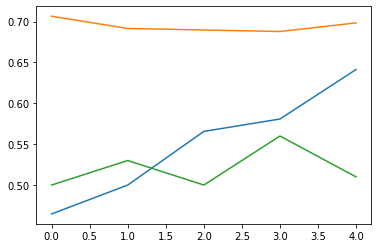

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])